<a href="https://colab.research.google.com/github/codingshinobi/mlprojects/blob/gh-pages/Naukri_com___jobs_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions to be answered ----- 


1.   What positions are more available?
2.   What Skills are in demand?
3.   Which city/ state has more requirement of data scientists?
4.   How much experience is required?
5.   Which companies are hiring?
6.   How much are they paying?



In [116]:
# importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [117]:
df = pd.read_excel(r"E:\DATASETS\Naukri\SourcePro_NkriJobs___106071204.xlsx")
df.head()

,Job Title,Job URL,Company Name,Compnay URL,Exp,Salary,Location,Skills,Posted
0,Web Development/Data Science Trainee,https://www.naukri.com/job-listings-web-develo...,Musubi Management Private Limited,https://www.naukri.com/musubi-management-jobs-...,0-0 Yrs,"3,50,000 - 6,00,000 PA.",Bangalore,Data Science|Web Development|IT Skills|Python|...,Just Now
1,Machine Learning/Data Science Engineer,https://www.naukri.com/job-listings-machine-le...,4ONLINEMEDIA,https://www.naukri.com/4onlinemedia-jobs-caree...,0-5 Yrs,"3,00,000 - 5,00,000 PA.",Bangalore,Python|analytical|Data science|Tableau|machine...,NaN
2,Data Science Analyst-Cyber Security Analyst-Na...,https://www.naukri.com/job-listings-data-scien...,ZINGO TECHSERVICES LLP,https://www.naukri.com/zingo-techservices-jobs...,0-3 Yrs,Not disclosed,Mumbai,Analytical|Security Analysis|Ethical Hacking|C...,2 Days Ago
3,Data Science Analyst-Cyber Security Analyst-Na...,https://www.naukri.com/job-listings-data-scien...,ZINGO TECHSERVICES LLP,https://www.naukri.com/zingo-techservices-jobs...,0-3 Yrs,"50,000 - 1,00,000 PA.",Mumbai,Analytical|Security Analysis|Ethical Hacking|C...,2 Days Ago
4,Urgently hiring For Data science Analysts - Pu...,https://www.naukri.com/job-listings-urgently-h...,FIS Global Business Solutions India Pvt. Ltd.,https://www.naukri.com/fis-global-business-sol...,4-9 Yrs,"5,00,000 - 15,00,000 PA.",Mumbai,Data Science|R|SAS|Artificial Intelligence|Sta...,1 Day Ago


In [118]:
df.tail()

,Job Title,Job URL,Company Name,Compnay URL,Exp,Salary,Location,Skills,Posted
1015,Python Programmer,https://www.naukri.com/job-listings-python-pro...,Agreeya,https://www.naukri.com/agreeya-jobs-careers-28505,2-6 Yrs,Not disclosed,Gurgaon,Business process|Data analysis|development tes...,NaN
1016,Senior UX Desginer/UX Designer,https://www.naukri.com/job-listings-senior-ux-...,Salesforce,https://www.naukri.com/salesforce-jobs-careers...,3-6 Yrs,Not disclosed,Hyderabad,Product management|User research|Product launc...,NaN
1017,Business Analyst,https://www.naukri.com/job-listings-business-a...,Novel Office,https://www.naukri.com/novel-office-jobs-caree...,0-3 Yrs,Not disclosed,Bangalore(Koramangala +4),Data Science|Data Research|Business Analytics|...,21 Days Ago
1018,Data Scientist || IT Service Org || Bengaluru ...,https://www.naukri.com/job-listings-data-scien...,Macrohire LLP,https://www.naukri.com/macrohire-jobs-careers-...,6-11 Yrs,Not disclosed,Bangalore,IT Skills|Python|Data Science|Machine Learning...,5 Days Ago
1019,Full Stack Developer - Java/J2EE Framework,https://www.naukri.com/job-listings-full-stack...,Huquo Consulting Pvt. Ltd,https://www.naukri.com/premium-jobs-careers-85...,3-7 Yrs,Not disclosed,Bangalore,IT Skills|Java|J2EE|Python|Software Developmen...,7 Days Ago


In [119]:
df= df.dropna()
df.shape

(893, 9)

In [120]:
#lets lower case all the strings to avoid redundancy
df=df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split Location and jobs.
df.Skills=[Skills.split("|") for Skills in df.Skills]

In [121]:
df.head()

,Job Title,Job URL,Company Name,Compnay URL,Exp,Salary,Location,Skills,Posted
0,web development/data science trainee,https://www.naukri.com/job-listings-web-develo...,musubi management private limited,https://www.naukri.com/musubi-management-jobs-...,0-0 yrs,"3,50,000 - 6,00,000 pa.",bangalore,"[data science, web development, it skills, pyt...",just now
2,data science analyst-cyber security analyst-na...,https://www.naukri.com/job-listings-data-scien...,zingo techservices llp,https://www.naukri.com/zingo-techservices-jobs...,0-3 yrs,not disclosed,mumbai,"[analytical, security analysis, ethical hackin...",2 days ago
3,data science analyst-cyber security analyst-na...,https://www.naukri.com/job-listings-data-scien...,zingo techservices llp,https://www.naukri.com/zingo-techservices-jobs...,0-3 yrs,"50,000 - 1,00,000 pa.",mumbai,"[analytical, security analysis, ethical hackin...",2 days ago
4,urgently hiring for data science analysts - pu...,https://www.naukri.com/job-listings-urgently-h...,fis global business solutions india pvt. ltd.,https://www.naukri.com/fis-global-business-sol...,4-9 yrs,"5,00,000 - 15,00,000 pa.",mumbai,"[data science, r, sas, artificial intelligence...",1 day ago
5,data science analyst,https://www.naukri.com/job-listings-data-scien...,jpmorgan services india pvt. ltd,https://www.naukri.com/jpmorgan-services-india...,4-9 yrs,not disclosed,"mumbai, bangalore","[data science, r, artificial intelligence, exp...",1 day ago


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     893 non-null    object
 1   Job URL       893 non-null    object
 2   Company Name  893 non-null    object
 3   Compnay URL   893 non-null    object
 4   Exp           893 non-null    object
 5   Salary        893 non-null    object
 6   Location      893 non-null    object
 7   Skills        893 non-null    object
 8   Posted        893 non-null    object
dtypes: object(9)
memory usage: 69.8+ KB


# 1. Let's see which city currently has most demand for the data scientists.

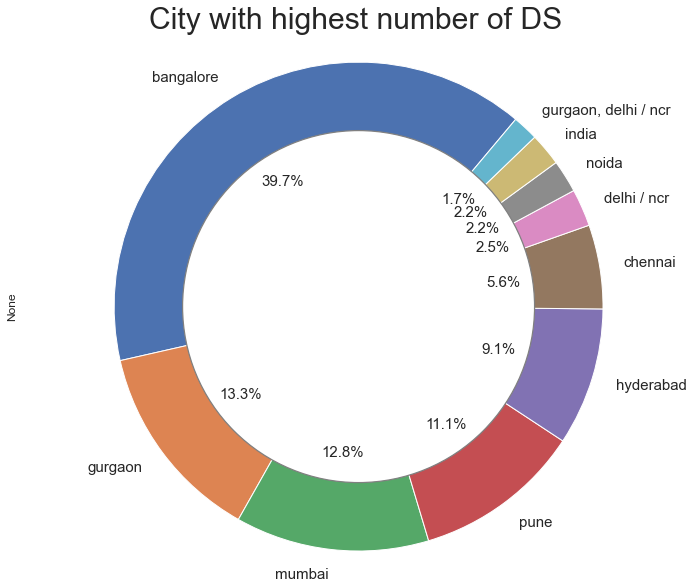

In [123]:
df.Location.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("City with highest number of DS",fontsize=30)
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

**No surprises here.**

# 2. What Skills are in demand?

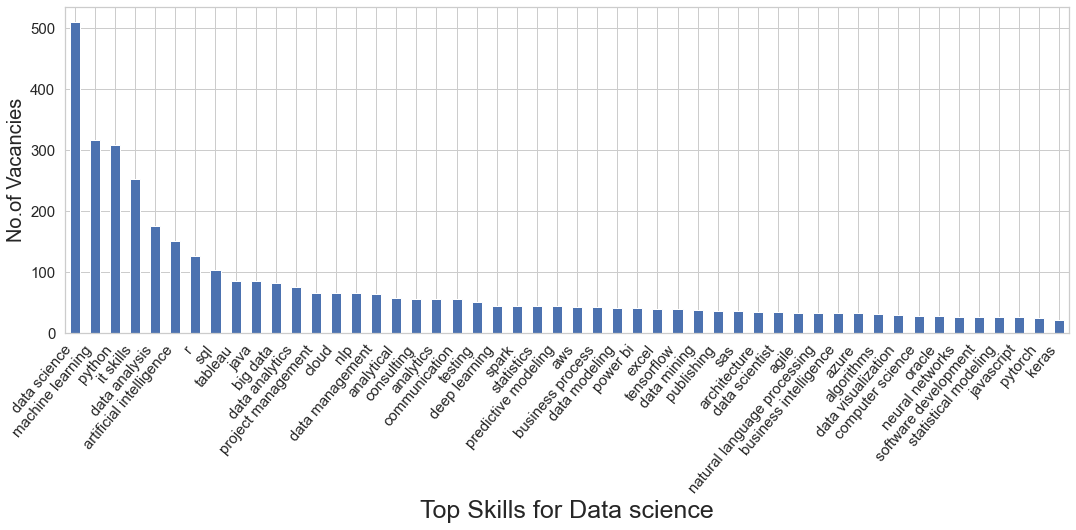

In [124]:
df.Skills.apply(pd.Series).stack().value_counts()[:50].plot(kind="bar",figsize=(18,6),fontsize=15,color="b")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

These are the top 50 skills that the recruiters have mentioned. If we look past **Data Science** (as it is the umbrella term for everything), we find **ML, Python, IT Skills, Data analysis, AI, SQL, Tableau** to be the most important skills to have for the job.

In [125]:
# If we were to look for a more precise answer
top_skills = pd.DataFrame(df.Skills.apply(pd.Series).stack().value_counts()).reset_index()
top_skills.columns = ["Skill", "Count"]
top_skills.head(6)

,Skill,Count
0,data science,509
1,machine learning,316
2,python,308
3,it skills,252
4,data analysis,176
5,artificial intelligence,151


# 3. Which companies are hiring?

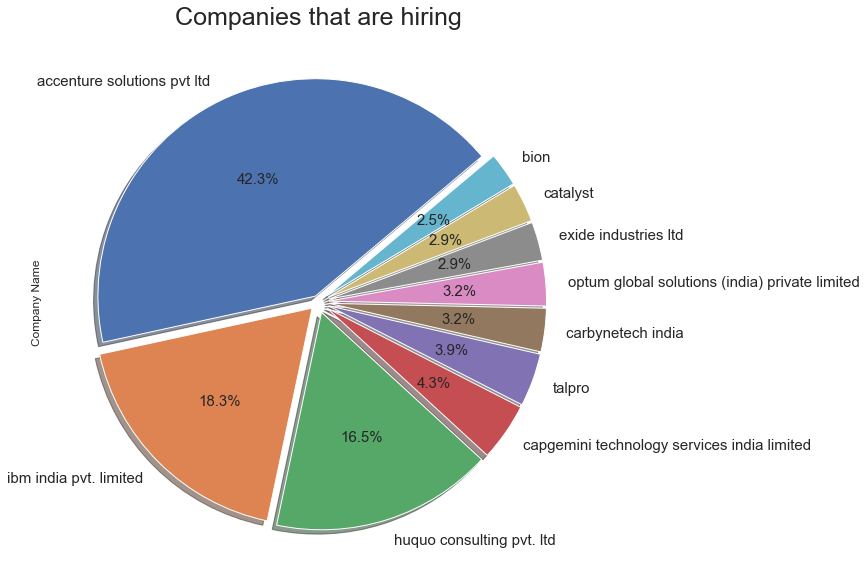

In [126]:
df["Company Name"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=15)
plt.title("Companies that are hiring",fontsize=25)
plt.show()

As we see from the chart that Accenture is hiring the most followed by IBM.

In [127]:
df['Company Name'].value_counts()

accenture solutions pvt ltd                      118
ibm india pvt. limited                            51
huquo consulting pvt. ltd                         46
capgemini technology services india limited       12
talpro                                            11
                                                ... 
isparrow hr solutions                              1
suyati technologies pvt ltd                        1
unison international consulting pvt. ltd           1
fis global business solutions india pvt. ltd.      1
innovative trending solutions                      1
Name: Company Name, Length: 439, dtype: int64

# 4. Popular roles offered

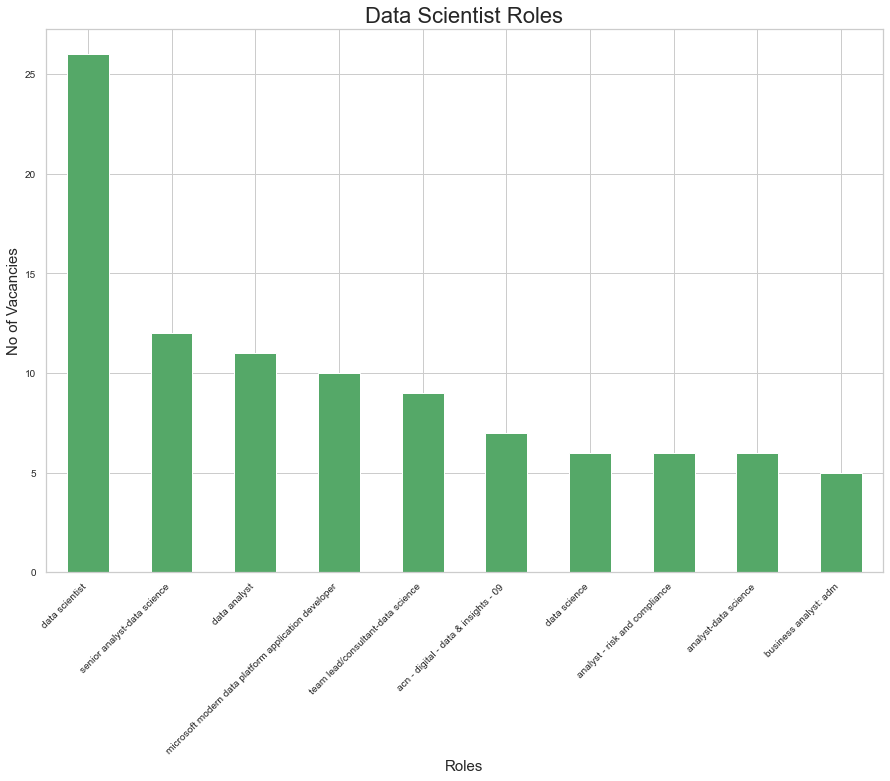

In [128]:
plt.figure(figsize=(15,10))
df['Job Title'].value_counts()[:10].plot.bar(color = 'g', fontsize = 10)
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

These are the top 10 roles that are offered. Data scientist, data analystand Business analyst are the ones that are most popular.

#5. How much experience are they looking?

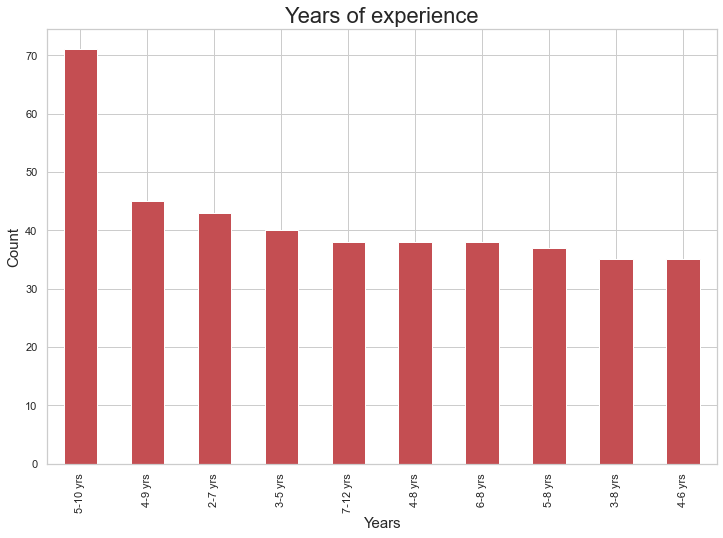

In [139]:
plt.figure(figsize=(12,8))
df['Exp'].value_counts()[:10].plot.bar(color = 'r')
plt.title("Years of experience",fontsize=22)
plt.ylabel("Count",fontsize=15,rotation=90)
plt.xlabel("Years",fontsize=15)
plt.show()

As we can see that, the companies are looking for experienced prifessionals, most of them want candidates from 4 to 10 years of experienced. This is bad for people like me!!

# 6. How much are they paying?

In [140]:
pd.DataFrame(df['Salary'].value_counts()[:20])

,Salary
not disclosed,753
"15,00,000 - 30,00,000 pa.",6
"8,00,000 - 12,00,000 pa.",5
"15,00,000 - 25,00,000 pa.",5
"4,00,000 - 6,00,000 pa.",4
"2,00,000 - 5,00,000 pa.",4
"6,00,000 - 12,00,000 pa.",4
"6,00,000 - 16,00,000 pa.",4
"15,00,000 - 20,00,000 pa.",4
"5,00,000 - 15,00,000 pa.",3


Too hard to find a patteren here, as most of them haven't disclosed the salary.

PS- I performed some basic data cleaning in EXCEL itself.